# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [1]:
import pandas as pd
import numpy as np
from seaborn import load_dataset

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [10]:
import seaborn as sns
import pandas as pd
import numpy as np
import patsy
import statsmodels.api as sm

# Carregar a base de dados 'tips'
tips = sns.load_dataset("tips")

# Criar a variável 'net_bill'
tips['net_bill'] = tips['total_bill'] - tips['tip']

# Criar a matriz de design (X) e a matriz de resposta (y) utilizando Patsy
y, X = patsy.dmatrices('tip ~ sex + smoker + time + net_bill', data=tips)

# Converter X para um DataFrame do pandas
X_df = pd.DataFrame(X, columns=X.design_info.column_names)

# Ajustar o modelo de regressão linear
model = sm.OLS(y, X_df).fit()

# Obter variáveis significativas (p-value < 0.05)
significant_vars = model.pvalues[model.pvalues < 0.05].index

# Filtrar X_df para manter apenas variáveis significativas
X_significant_df = X_df[significant_vars]

# Exibir as variáveis significativas
significant_vars


Index(['Intercept', 'net_bill'], dtype='object')

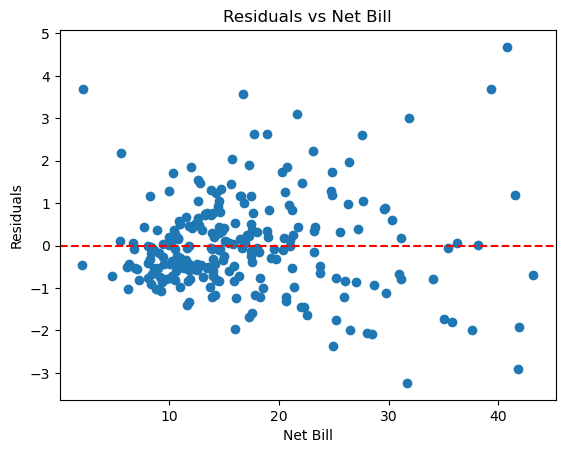

{'Original': 760.2663178186956, 'Log Transformed': 774.436325755411, 'Polynomial Transformed': 770.9185283002569}


In [11]:
# 1. Plotar o Gráfico de Resíduos em Função de net_bill
plt.scatter(tips['net_bill'], model.resid)
plt.xlabel('Net Bill')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Net Bill')
plt.show()

# 2. Testar Transformações de net_bill
# Logaritmo de net_bill
tips['log_net_bill'] = np.log(tips['net_bill'])
y_log, X_log = patsy.dmatrices('tip ~ sex + smoker + time + log_net_bill', data=tips)
model_log = sm.OLS(y_log, X_log).fit()

# Polinômio de net_bill (quadrado)
tips['net_bill_squared'] = tips['net_bill'] ** 2
y_poly, X_poly = patsy.dmatrices('tip ~ sex + smoker + time + net_bill_squared', data=tips)
model_poly = sm.OLS(y_poly, X_poly).fit()

# 3. Escolher o Melhor Modelo
# Comparando os modelos pelo AIC
aic_values = {
    'Original': model.aic,
    'Log Transformed': model_log.aic,
    'Polynomial Transformed': model_poly.aic
}

# Exibindo os valores de AIC
print(aic_values)



In [12]:
import seaborn as sns
import numpy as np
import patsy
import statsmodels.api as sm

# Carregando a base de dados 'tips'
tips = sns.load_dataset("tips")

# Criando a variável 'net_bill'
tips['net_bill'] = tips['total_bill'] - tips['tip']

# Aplicando a transformação logarítmica a net_bill
tips['log_net_bill'] = np.log(tips['net_bill'])

# Criando a variável polinomial (quadrado de net_bill)
tips['net_bill_squared'] = tips['net_bill'] ** 2

# Ajustando modelos para as transformações
# Modelo com log de net_bill
y_log, X_log = patsy.dmatrices('tip ~ sex + smoker + time + log_net_bill', data=tips)
model_log = sm.OLS(y_log, X_log).fit()

# Modelo com net_bill ao quadrado
y_poly, X_poly = patsy.dmatrices('tip ~ sex + smoker + time + net_bill_squared', data=tips)
model_poly = sm.OLS(y_poly, X_poly).fit()

model_log.summary(), model_poly.summary()


(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                    tip   R-squared:                       0.296
 Model:                            OLS   Adj. R-squared:                  0.284
 Method:                 Least Squares   F-statistic:                     25.06
 Date:                Fri, 24 Nov 2023   Prob (F-statistic):           2.41e-17
 Time:                        10:53:20   Log-Likelihood:                -382.22
 No. Observations:                 244   AIC:                             774.4
 Df Residuals:                     239   BIC:                             791.9
 Df Model:                           4                                         
 Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
 -----------------------------------------------------------------

In [13]:
import seaborn as sns
import numpy as np
import patsy
import statsmodels.api as sm

# Carregando a base de dados 'tips'
tips = sns.load_dataset("tips")

# Criando a variável 'net_bill'
tips['net_bill'] = tips['total_bill'] - tips['tip']

# Aplicando a transformação logarítmica a net_bill
tips['log_net_bill'] = np.log(tips['net_bill'])

# Criando a variável polinomial (quadrado de net_bill)
tips['net_bill_squared'] = tips['net_bill'] ** 2

# Ajustando modelos para as transformações
# Modelo com log de net_bill
y_log, X_log = patsy.dmatrices('tip ~ sex + smoker + time + log_net_bill', data=tips)
model_log = sm.OLS(y_log, X_log).fit()

# Modelo com net_bill ao quadrado
y_poly, X_poly = patsy.dmatrices('tip ~ sex + smoker + time + net_bill_squared', data=tips)
model_poly = sm.OLS(y_poly, X_poly).fit()

model_log.summary(), model_poly.summary()


(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                    tip   R-squared:                       0.296
 Model:                            OLS   Adj. R-squared:                  0.284
 Method:                 Least Squares   F-statistic:                     25.06
 Date:                Fri, 24 Nov 2023   Prob (F-statistic):           2.41e-17
 Time:                        10:56:08   Log-Likelihood:                -382.22
 No. Observations:                 244   AIC:                             774.4
 Df Residuals:                     239   BIC:                             791.9
 Df Model:                           4                                         
 Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
 -----------------------------------------------------------------

 III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.